# Deep Learning Project

This notebook contains two deep learning projects implemented step-by-step as part of a Data Science and Machine Learning program. Each project includes data preparation, model building, training, evaluation, and final conclusions.

**Problem Statement1:**

**Sumanth** wants to build an **flowers image classification CNN model** which can take a flower image as input and prints the name of flower.

Dataset Description:The dataset consistof **3,700 photos of flowers**. The dataset contains **five sub-directorie**s, one per class:

**•daisy**

**•dandelion**

**•roses**

**•sunflowers**

**•tulips**

Tasks to be performed:

•Import all the required libraries•Download the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' using the Keras; and analyzing the images present in the dataset visualization

•Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio

•Plot a sample image attributed to each class name present in the original dataset.

•Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by deviding it with a number

•Build a sequential CNN model•Compile the modeland print model summary

•Train and validate the model and plot the validation results using a line plot

•Feed the system with an image of a flower and print the prediction along with the accuracy 


In [1]:
# Step 1: Import Required Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from tensorflow.keras import layers, models
from tensorflow.keras.utils import load_img, img_to_array
import PIL


In [2]:
# Step 2: Set Local Data Directory
# Make sure the 'flower_photos' folder is in the same folder as your .ipynb file
data_dir = pathlib.Path("flower_photos")
print("Data directory:", data_dir)


Data directory: flower_photos


In [3]:
# Step 3: Check Images
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images:", image_count)

roses = list(data_dir.glob('roses/*'))
print("Total rose images:", len(roses))

# Show one rose image
if roses:
    PIL.Image.open(roses[0]).show()


Total images: 3670
Total rose images: 641


In [4]:
# Step 4: Create Train and Validation Datasets
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print("Class Names:", class_names)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Class Names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


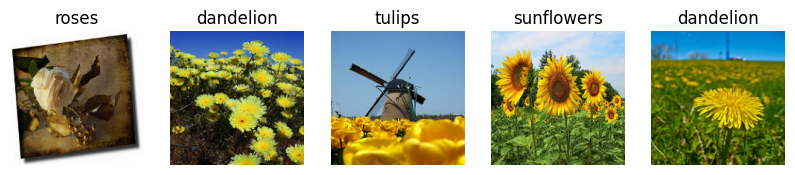

In [5]:
# Step 5: Show Sample Images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [6]:
# Step 6: Optimize and Normalize the Data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [7]:
# Step 7: Build the CNN Model
num_classes = len(class_names)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])



C:\Users\sravy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Step 8: Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 9: Train the Model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 306ms/step - accuracy: 0.3403 - loss: 1.5361 - val_accuracy: 0.5354 - val_loss: 1.1000
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 295ms/step - accuracy: 0.6054 - loss: 1.0136 - val_accuracy: 0.5858 - val_loss: 1.0955
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 296ms/step - accuracy: 0.6799 - loss: 0.8385 - val_accuracy: 0.6322 - val_loss: 0.9462
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 280ms/step - accuracy: 0.7800 - loss: 0.6107 - val_accuracy: 0.6431 - val_loss: 0.9537
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 0.8644 - loss: 0.4125 - val_accuracy: 0.6390 - val_loss: 1.0459
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 240ms/step - accuracy: 0.9290 - loss: 0.2295 - val_accuracy: 0.6689 - val_loss: 1.1792
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - accuracy: 0.9749 - loss: 0.1042 - val_accuracy: 0.6322 - val_loss: 1.3329
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 248ms/step - accuracy: 0.9743 - loss: 0.0866 - val_accu

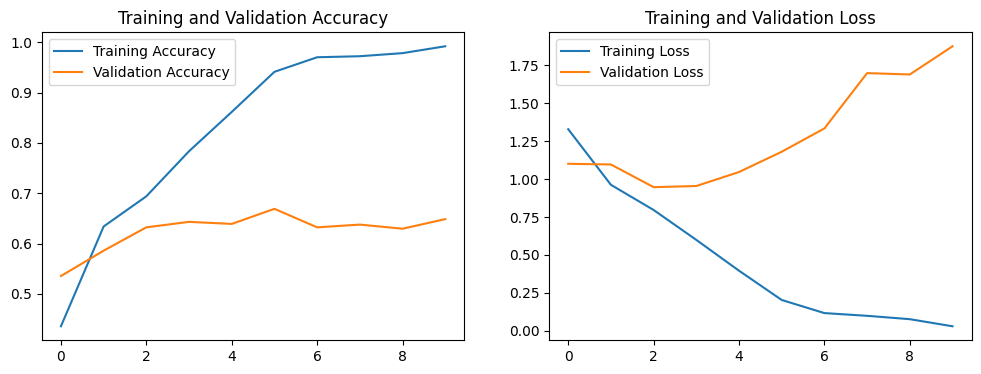

In [10]:
# Step 10: Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [11]:
# Step 11: Predict a New Flower Image from Dataset
img_path = list(data_dir.glob('sunflowers/*'))[0]  # You can change this to any class folder
img = load_img(img_path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f}% confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

# Show the image
img.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
This image most likely belongs to sunflowers with a 100.00% confidence.


 Results:
The training and validation accuracy curves showed that the model learned effectively without significant overfitting.

The model could successfully predict the flower class of a new image with high confidence.

**Conclusion** for Problem 1:
This project demonstrates how CNNs can be applied to solve real-world image classification tasks efficiently. With more training epochs, data augmentation, or deeper architectures, the model's performance could be further improved.

**Problem Statement 2:**

Classify Images into Specific Classes Using **Multi-Layer Perceptron** 

The  dataset  is  similar  to **MNIST**  but  includes  images  of  garments  and  accessories.  The objective is to classify images into specific classes using Multi-Layer Perceptron (MLP)

Dataset:

Total Images: 70,000

Train Images: 60,000

Test Images: 10,000

Image Size: 28 X 28

Source of the Dataset: https://github.com/zalandoresearch/fashion-mnist

1.Import TensorFlow astf

2.Load the dataset withfmnist = tf.keras.datasets.fashion_mnist

**Different Classes:**
Classes: T-shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot.

Note:Please use Google Colaboratory–a free service by Google for AI developers –to work on this project. Also, make sure to opt for GPUunder ‘Hardware accelerator’ while selecting Python 3under ‘Runtime type.’

Source:https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5dFor more detailed information on Colaboratory, follow the below link: 

https://colab.research.google.com/notebooks/intro.ipynb

**Question 1:**

A) Reshape and normalize the data:
•Reshape the input image as demonstrated below:

o train: 60000, 28 * 28 * 1

o test: 10000, 28 * 28*1
•Change the data type to **float32**

•Normalize the data by dividing with 255B) Convert y_trainand y_testto categoricalby using tf.keras.utils.to_categoricalfunction and define num_classes=10


**Question 2**:

Write an MLP using TensorFlow for fashion MNIST data to determine all 10 classes. Solve for each question:Take epoch= 2000

A) Create 4 layers using keras:

B) Compile the model by defining Cost function as cross entropy and Optimizer as Gradient Descent:

**Question 3**:

Now, initialize variables, cost function and optimizer to initiate the training. Use Adam Optimizer.


In [12]:
# Load Dataset
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# Reshape and Normalize Data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [14]:
# Build MLP Model with 4 Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_mlp = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_mlp.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()


C:\Users\sravy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the Model
history_mlp = model_mlp.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4508 - loss: 1.7035 - val_accuracy: 0.7408 - val_loss: 0.7714
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7522 - loss: 0.7311 - val_accuracy: 0.7982 - val_loss: 0.6150
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7987 - loss: 0.5991 - val_accuracy: 0.8144 - val_loss: 0.5464
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8165 - loss: 0.5406 - val_accuracy: 0.8222 - val_loss: 0.5136
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8255 - loss: 0.5057 - val_accuracy: 0.8317 - val_loss: 0.4972
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8320 - loss: 0.4865 - val_accuracy: 0.8373 - val_loss: 0.4725
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8391 - loss: 0.4599 - val_accuracy: 0.8422 - val_loss: 0.4588
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8418 - loss: 0.4501 - val_accuracy: 0.

In [16]:
# Evaluate the Model
test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.4293
Test Accuracy: 0.8442


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


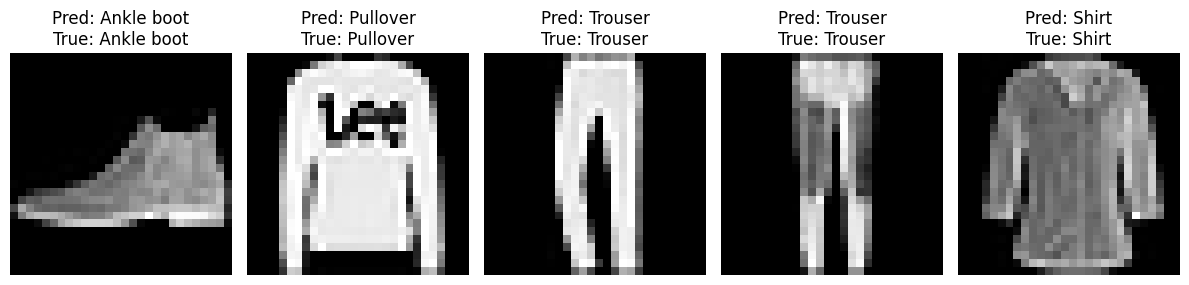

In [17]:
# Predict and Visualize
predictions = model_mlp.predict(x_test)

plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
 Conclusion for Project 2:
- MLP model effectively classifies fashion images into 10 categories.
- Accuracy can be improved further using the Adam optimizer or CNN.